In [1]:
import os
import datetime
import json
import glob

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import xarray as xr

from driftutils.assemble_drifter_metadata import assemble_drifter_metadata

In [2]:
data_dir = '/home/jmm000/work/Drifters/output/TechReport2023/netcdf/'
all_drifters = glob.glob(os.path.join(data_dir, '*', '*.nc'))

In [3]:
assemble_drifter_metadata(data_dir, 'all_drifters.json')

In [4]:
with open('all_drifters.json', 'r') as f:
    metadata = json.load(f)

In [5]:
def identify_drifters_in_launch_year(year, metadata):
    drifters  = []
    for d in metadata['drifters']:
        launch=datetime.datetime.strptime(d['launch_date'], '%Y-%m-%d')
        if launch.year == year:
            drifters.append(d['filename'])
    return drifters

In [6]:
drifters = identify_drifters_in_launch_year(2022, metadata)

In [7]:
def plot_drifters(drifter_files, ax, color='r', lw=0.5):
    for drifter_file in drifter_files:
        d = xr.open_dataset(drifter_file)
        ax.plot(d.LONGITUDE, d.LATITUDE, color=color, 
                transform=ccrs.PlateCarree(),linewidth=lw)
    

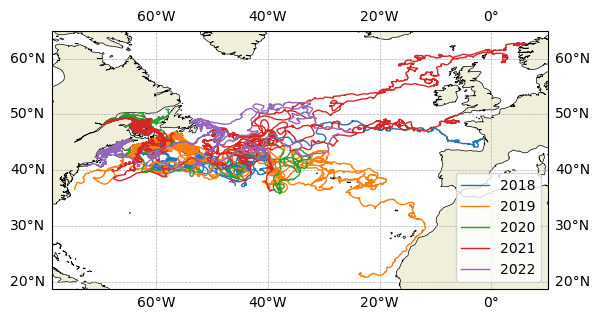

In [8]:
years = np.arange(2018, 2023)
year_colors = {year: f'C{i}' for i, year in enumerate(years)}
linewidth=1

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
handles = []
for year, color in year_colors.items():
    drifters = identify_drifters_in_launch_year(year, metadata)
    plot_drifters(drifters, ax, color=color, lw=linewidth)
    handles.append(Line2D([0], [0], label=year, color=color, linewidth=linewidth))
# Add legend
ax.legend(handles=handles)
#ax.coastlines()
ax.add_feature(cfeature.LAND, edgecolor='black', linewidth=0.5)
ax.gridlines(draw_labels=True,zorder=0,linewidth=0.5, linestyle='--')

In [9]:
metadata

{'updated': '2023-08-08T18:29:20.709752',
 'drifters': [{'buoyid': 'DavisDFOSIO220903',
   'filename': '/home/jmm000/work/Drifters/output/TechReport2023/netcdf/SOI_2022-09/Davis_DFO-SIO-22-09_03_20220920_20221017.nc',
   'start_data_date': '2022-09-20T16:35:00.000002304',
   'last_data_date': '2022-10-17T15:59:59.999996160',
   'ID': 'Davis DFO-SIO-22-09 03',
   'track_number': '1',
   'IMEI': '300234066036000',
   'wmoid': '',
   'type': 'CODE/Davis',
   'approximate_drogue_depth_meters': '0',
   'region': 'Atlantic',
   'launch_date': '2022-09-20',
   'duration_days': '26.97569444437977',
   'distance_km': '729.7566869156742',
   'admin_mission': 'SOI_2022-09',
   'admin_agency': 'Bedford Institute of Oceanography, Dartmouth, NS',
   'admin_country': 'Canada',
   'admin_project': 'Oceans Protection Plan (OPP) / CONCEPTS',
   'admin_scientist': 'Schillinger, D.',
   'admin_platform': 'Polar Prince',
   'grounding_time': '0000/00/00',
   'grounding_lon': '0.0',
   'grounding_lat': '0.0